<a href="https://colab.research.google.com/github/thejaswini82/PROJECTS/blob/main/House_Rental_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
import pandas as pd

In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
df = pd.read_csv(url)

In [ ]:
# Display the first few rows of the dataset
df.head()


,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [ ]:
# Get basic statistics for numerical columns
df.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [ ]:
# Check for missing values
df.isnull().sum()



Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [ ]:
# Check data types of columns
df.dtypes

Unnamed: 0       int64
Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [ ]:

# Get the number of rows and columns
df.shape

(645, 8)

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64


In [ ]:
# Impute missing values with the mean
df.fillna(df.mean(), inplace=True)

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_cols)

Categorical Columns:
 Index([], dtype='object')


In [ ]:
numerical_cols = df.select_dtypes(exclude=['object']).columns
print("Numerical Columns:\n", numerical_cols)

Numerical Columns:
 Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Handle Outliers (if needed)
# To identify and handle outliers, you can visualize the distribution of numerical features using histograms or box plots.
# Outliers can be treated by removing them or applying transformations.

# Example of removing outliers using the Interquartile Range (IQR)
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Summary Statistics
# Get summary statistics for numerical features
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
        Unnamed: 0        Sqft       Floor  TotalFloor     Bedroom  \
count  328.000000  328.000000  328.000000  328.000000  328.000000   
mean    -0.009722    0.176243   -0.024417    0.049558    0.247173   
std      0.999483    0.813808    0.982666    1.002805    0.857807   
min     -1.746212   -1.715945   -1.461487   -1.462115   -2.464474   
25%     -0.860509   -0.393729   -0.793840   -0.756141    0.002711   
50%     -0.047493    0.057629   -0.126193    0.185156    0.002711   
75%      0.855708    0.747942    0.541455    0.891130    1.236304   
max      1.731988    2.787021    2.544396    2.538401    2.469896   

        Living.Room      Bathroom       Price  
count  3.280000e+02  3.280000e+02  328.000000  
mean  -5.551115e-17  2.751997e-01    0.054538  
std    0.000000e+00  5.559597e-17    0.890168  
min   -5.551115e-17  2.751997e-01   -1.639131  
25%   -5.551115e-17  2.751997e-01   -0.575122  
50%   -5.551115e-17  2.751997e-01   -0.131785  
75%   -5.551115e-17  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

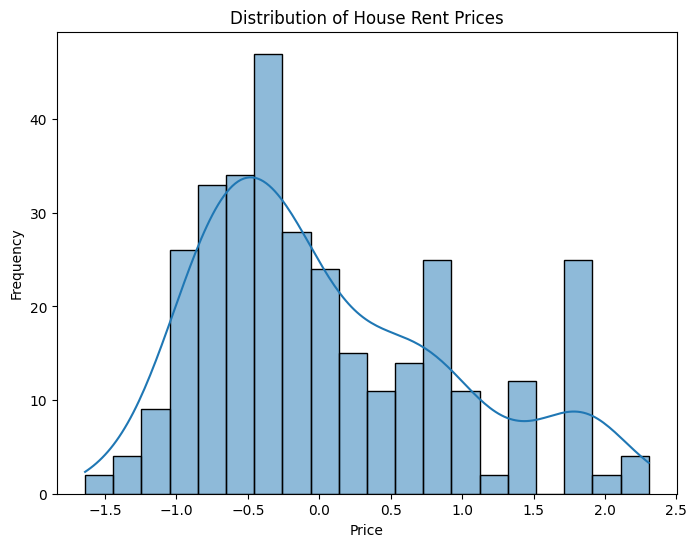

In [ ]:
# Data Visualization
# Visualize the distribution of the target variable (Price)
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of House Rent Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



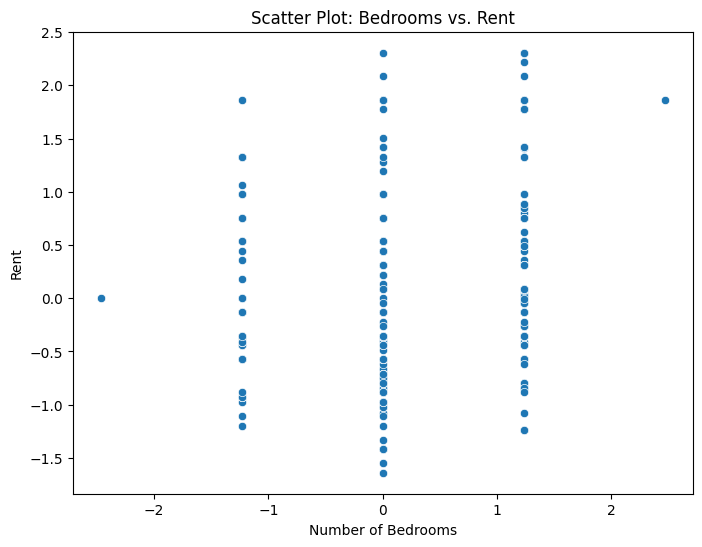

In [ ]:

# Scatter Plot: Bedrooms vs. Rent
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Bedroom', y='Price', data=df)
plt.title('Scatter Plot: Bedrooms vs. Rent')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rent')
plt.show()


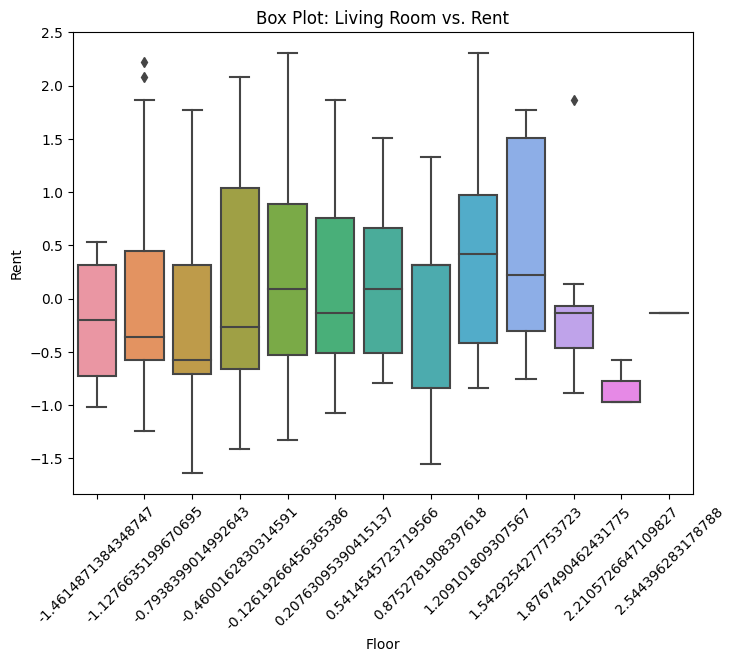

In [ ]:

# Box Plot: Area Type vs. Rent
plt.figure(figsize=(8, 6))
sns.boxplot(x='Floor', y='Price', data=df)
plt.title('Box Plot: Living Room vs. Rent')
plt.xlabel('Floor')
plt.ylabel('Rent')
plt.xticks(rotation=45)
plt.show()


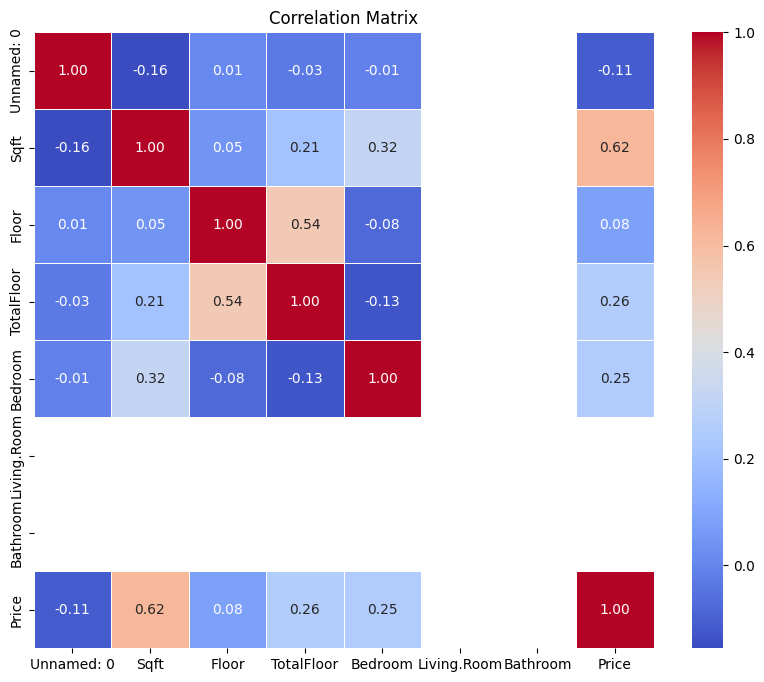

In [ ]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Creating a new feature: Price per square foot
df['Price_per_sqft'] = df['Price'] / df['Sqft']

# Encoding categorical variables (if needed)
# Example: Convert 'Bedroom' to a numerical feature
df['Bedroom'] = df['Bedroom'].astype(int)


In [ ]:
# Feature scaling (if needed)
# Example: Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom', 'Price']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = df.drop('Price', axis=1)  # Features excluding 'Price'
y = df['Price']  # Target variable 'Price'

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: Features for training
# X_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing


In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.6753868047360029
Mean Squared Error (MSE): 0.7523320490589276
Root Mean Squared Error (RMSE): 0.8673707679296827
R-squared (R2): 0.3184687323014498


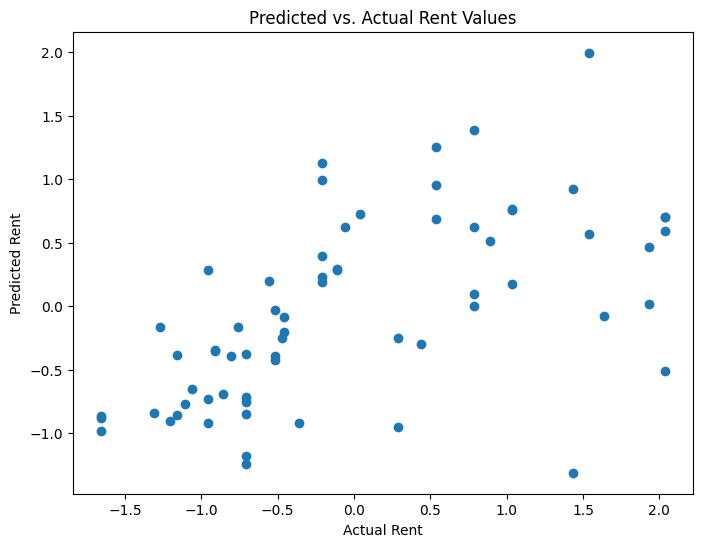

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual rent values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.title('Predicted vs. Actual Rent Values')
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.show()


In [ ]:
# Assuming you have a trained model called 'model'
# Perform cross-validation and calculate evaluation metrics
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5

# Print the cross-validation RMSE scores for evaluation
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())


Cross-Validation RMSE Scores: [0.74315394 0.82134971 0.79624414 0.84858246 0.61221377]
Mean RMSE: 0.7643088029009522
